In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Link to code - https://www.kaggle.com/code/sailikhitarage/variousarchitectures-642**

In [148]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [172]:
def load_Images(path,x,grayscale=False):
        imgs=[]
        label=[]
        l1=os.listdir(path)
        for i in l1:
            l2=os.listdir(path+"/"+i)
            c = 0
            for j in l2:
                if c>900:
                    break
                img=Image.open(path+i+"/"+j)
                img=img.resize(size=(x,x))
                if(grayscale):
                    img=img.convert("L")
                    img=np.array(img,dtype=np.float16)/255
                    img=img.reshape(img.shape[0],img.shape[1],1)
                else:
                    img=np.array(img,dtype=np.float16)/255
                imgs.append(np.array(img))
                label.append(i)
                c = c+1
                del img
        return np.array(imgs),label

# LENET

The network has 5 layers. It has three sets of convolution layers with a combination of average pooling. After the convolution and average pooling layers, we have two fully connected layers.

**Train and test data**

In [173]:
x_train,y_train  = load_Images("/kaggle/input/satellite-images-of-hurricane-damage/train_another/",28,True)

In [174]:
x_test,y_test = load_Images("/kaggle/input/satellite-images-of-hurricane-damage/test_another/",28,True)

In [175]:
x_train.shape

(1802, 28, 28, 1)

In [176]:
len(y_train)

1802

In [177]:
x_test.shape

(1802, 28, 28, 1)

In [178]:
len(y_test)

1802

In [179]:
t_train = pd.Series(y_train,dtype='category')
t_train = t_train.cat.codes
t_test = pd.Series(y_test,dtype='category')
t_test = t_test.cat.codes

In [180]:
len(t_test)

1802

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense 

**Building LeNet-5 Model**

In [182]:
#LENET Model
from keras.layers import AveragePooling2D
model = Sequential()
model.add(Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'tanh', 
 input_shape = (28,28,1), padding = 'same'))
# S2 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
# C3 Convolutional Layer
model.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',
 padding = 'valid'))
# S4 Pooling Layer
model.add(AveragePooling2D(pool_size = 2, strides = 2, padding = 'valid'))
# C5 Convolutional Layer
model.add(Conv2D(filters = 120, kernel_size = 5, strides = 1,activation = 'tanh',
 padding = 'valid'))
model.add(Flatten()) 
# FC6 Fully Connected Layer
model.add(Dense(units = 84, activation = 'tanh'))
# FC7 Output layer with softmax activation
model.add(Dense(units =2, activation = 'softmax'))

In [183]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_79 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_10 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_11 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_13 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 84)              

In [184]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [185]:
history = model.fit(x_train,t_train,batch_size=10,epochs=20,validation_data=(x_test,t_test))

Epoch 1/20
181/181 [==============================] - 1s 6ms/step - loss: 0.6572 - accuracy: 0.6165 - val_loss: 0.6577 - val_accuracy: 0.5954
Epoch 2/20
181/181 [==============================] - 1s 5ms/step - loss: 0.6370 - accuracy: 0.6421 - val_loss: 0.6287 - val_accuracy: 0.6626
Epoch 3/20
181/181 [==============================] - 1s 5ms/step - loss: 0.6263 - accuracy: 0.6648 - val_loss: 0.6512 - val_accuracy: 0.6021
Epoch 4/20
181/181 [==============================] - 1s 5ms/step - loss: 0.6201 - accuracy: 0.6637 - val_loss: 0.6500 - val_accuracy: 0.6321
Epoch 5/20
181/181 [==============================] - 1s 5ms/step - loss: 0.6216 - accuracy: 0.6598 - val_loss: 0.6315 - val_accuracy: 0.6532
Epoch 6/20
181/181 [==============================] - 1s 7ms/step - loss: 0.6110 - accuracy: 0.6654 - val_loss: 0.6451 - val_accuracy: 0.6249
Epoch 7/20
181/181 [==============================] - 1s 6ms/step - loss: 0.6113 - accuracy: 0.6776 - val_loss: 0.6379 - val_accuracy: 0.6476
Epoch 

**Plotting accuracy and loss for LeNet-5**

57/57 - 0s - loss: 0.6097 - accuracy: 0.6704


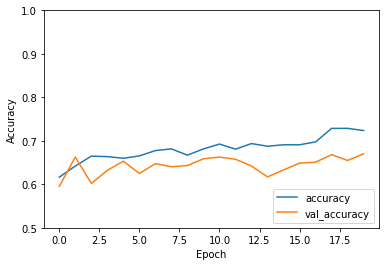

In [186]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,t_test, verbose=2)

In [187]:
test_loss, test_acc = model.evaluate(x_test,t_test, verbose=2)

57/57 - 0s - loss: 0.6097 - accuracy: 0.6704


In [188]:
print("Test accuracy is ",test_acc,end=", ")
print("Test loss is ",test_loss)

Test accuracy is  0.6703662872314453, Test loss is  0.6096503734588623


# AlexNet

The Alexnet has eight layers. The model consists of five layers with a combination of max pooling followed by 3 fully connected layers

In [189]:
from keras.layers import Activation,MaxPool2D, BatchNormalization, Dropout

**Train and test data**

In [190]:
x_train1,y_train1 = load_Images("/kaggle/input/satellite-images-of-hurricane-damage/train_another/",227,False)

In [191]:
x_test1,y_test1 = load_Images("/kaggle/input/satellite-images-of-hurricane-damage/test_another/",227,False)

In [192]:
t_trainalex = pd.Series(y_train1,dtype='category')
t_traina = t_trainalex.cat.codes
t_testalex = pd.Series(y_test1,dtype='category')
t_testa = t_testalex.cat.codes

**Building AlexNet Model**

In [193]:
modelAlex = Sequential() 
# 1st layer (CONV + pool + batchnorm)
modelAlex .add(Conv2D(filters= 96, kernel_size= (11,11), strides=(4,4), padding='valid', input_shape = (227,227,3)))
modelAlex.add(Activation('relu')) 
modelAlex.add(MaxPool2D(pool_size=(3,3), strides=(2,2)))
modelAlex.add(BatchNormalization())
 
# 2nd layer (CONV + pool + batchnorm)
modelAlex.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
modelAlex.add(Activation('relu'))
modelAlex.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='valid'))
modelAlex.add(BatchNormalization())
 
# layer 3 (CONV + batchnorm) 
modelAlex.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
modelAlex.add(Activation('relu'))
modelAlex.add(BatchNormalization())
 
# layer 4 (CONV + batchnorm) 
modelAlex.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
modelAlex.add(Activation('relu'))
modelAlex.add(BatchNormalization())
 
# layer 5 (CONV + batchnorm) 
modelAlex.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))

In [194]:
modelAlex.add(Flatten())
modelAlex.add(Dense(4096)) #input_shape=(32,32,3,)))
modelAlex.add(BatchNormalization())
modelAlex.add(Activation('relu'))
# Add Dropout to prevent overfitting
modelAlex.add(Dropout(0.4))

#2nd Fully Connected Layer
modelAlex.add(Dense(4096))
modelAlex.add(BatchNormalization())
modelAlex.add(Activation('relu'))
#Add Dropout
modelAlex.add(Dropout(0.4))
"""
#3rd Fully Connected Layer
modelAlex.add(Dense(1000))
modelAlex.add(BatchNormalization())
modelAlex.add(Activation('relu'))
#Add Dropout
modelAlex.add(Dropout(0.4))
"""
#Output Layer
modelAlex.add(Dense(2))
modelAlex.add(BatchNormalization())
modelAlex.add(Activation('softmax'))

In [195]:
modelAlex.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_82 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
activation_29 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_30 (Activation)   (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 256)     

In [196]:
modelAlex.compile(loss="sparse_categorical_crossentropy", optimizer= 'adam', metrics=['accuracy'])

In [197]:
history = modelAlex.fit(x_train1,t_traina,batch_size=10,epochs=20,validation_data=(x_test1,t_testa))

Epoch 1/20
181/181 [==============================] - 17s 88ms/step - loss: 0.4166 - accuracy: 0.8224 - val_loss: 0.9054 - val_accuracy: 0.5832
Epoch 2/20
181/181 [==============================] - 12s 69ms/step - loss: 0.3460 - accuracy: 0.8552 - val_loss: 1.1416 - val_accuracy: 0.5339
Epoch 3/20
181/181 [==============================] - 13s 73ms/step - loss: 0.3246 - accuracy: 0.8757 - val_loss: 0.8819 - val_accuracy: 0.6404
Epoch 4/20
181/181 [==============================] - 13s 70ms/step - loss: 0.2866 - accuracy: 0.8873 - val_loss: 0.3559 - val_accuracy: 0.8396
Epoch 5/20
181/181 [==============================] - 13s 69ms/step - loss: 0.2973 - accuracy: 0.8879 - val_loss: 0.8304 - val_accuracy: 0.6537
Epoch 6/20
181/181 [==============================] - 13s 70ms/step - loss: 0.2994 - accuracy: 0.8912 - val_loss: 1.0399 - val_accuracy: 0.5844
Epoch 7/20
181/181 [==============================] - 13s 69ms/step - loss: 0.2655 - accuracy: 0.9029 - val_loss: 2.9530 - val_accuracy:

**Plotting accuracy and loss for AlexNet**

57/57 - 1s - loss: 0.6264 - accuracy: 0.7536


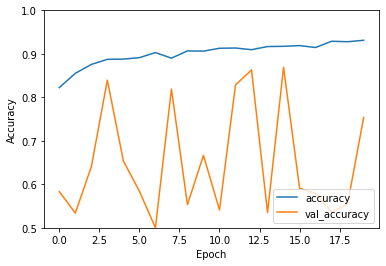

In [198]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = modelAlex.evaluate(x_test1,t_testa, verbose=2)

# VGG16

The 16 in VGG16 refers to 16 layers that have weights. In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.

**Train and test data**

In [199]:
x_trainvgg,y_trainvgg  = load_Images("/kaggle/input/satellite-images-of-hurricane-damage/train_another/",224,False)

In [200]:
x_testvgg,y_testvgg = load_Images("/kaggle/input/satellite-images-of-hurricane-damage/test_another/",224,False)

In [201]:
t_trainvgg = pd.Series(y_trainvgg,dtype='category')
t_trainv = t_trainvgg.cat.codes
t_testvgg = pd.Series(y_testvgg,dtype='category')
t_testv = t_testvgg.cat.codes

In [202]:
cl = dict(enumerate(t_trainvgg.cat.categories))

In [203]:
cl

{0: 'damage', 1: 'no_damage'}

**Building VGG16 Model**

In [204]:
modelv = Sequential()
modelv.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelv.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelv.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelv.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
modelv.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
"""
modelv.add(Flatten(name='flatten'))
modelv.add(Dense(256, activation='relu', name='fc1'))
modelv.add(Dense(128, activation='relu', name='fc2'))
modelv.add(Dense(1, activation='sigmoid', name='output'))
"""

"\nmodelv.add(Flatten(name='flatten'))\nmodelv.add(Dense(256, activation='relu', name='fc1'))\nmodelv.add(Dense(128, activation='relu', name='fc2'))\nmodelv.add(Dense(1, activation='sigmoid', name='output'))\n"

In [205]:
modelv.add(Flatten())
modelv.add(Dense(units=4096,activation="relu"))
modelv.add(Dense(units=4096,activation="relu"))
modelv.add(Dense(units=2, activation="softmax"))

In [206]:
modelv.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 56, 56, 256)     

In [207]:
modelv.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [208]:
history = modelv.fit(x_trainvgg,t_trainv,batch_size=10,epochs=20,validation_data=(x_testvgg,t_testv))

Epoch 1/20
181/181 [==============================] - 51s 254ms/step - loss: 0.7640 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
181/181 [==============================] - 40s 221ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
181/181 [==============================] - 40s 222ms/step - loss: 0.6932 - accuracy: 0.4789 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
181/181 [==============================] - 40s 221ms/step - loss: 0.6934 - accuracy: 0.4745 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
181/181 [==============================] - 40s 221ms/step - loss: 0.6933 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
181/181 [==============================] - 40s 221ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/20
181/181 [==============================] - 40s 221ms/step - loss: 0.6933 - accuracy: 0.4889 - val_loss: 0.6932 - val_ac

**Plotting accuracy and loss for VGG16**

57/57 - 7s - loss: 0.6931 - accuracy: 0.5000


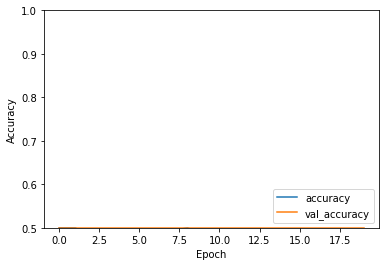

In [211]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = modelv.evaluate(x_testvgg,t_testv, verbose=2)

**Prediction using VGG16 model**

In [216]:
from matplotlib.pyplot import imshow
def Prediction(img):
    x = np.array(img.resize((224,224)))
    x = x.reshape(1,224,224,3)
    res = modelv.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print(str(res[0][classification]*100) + '% Confidence ' + cl[classification])

61.753666400909424% Confidence no_damage


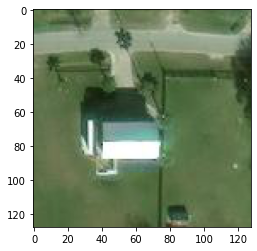

In [217]:
img = Image.open(r"/kaggle/input/satellite-images-of-hurricane-damage/test_another/no_damage/-95.06604899999999_29.831622999999997.jpeg")
Prediction(img)

55.59669733047485% Confidence no_damage


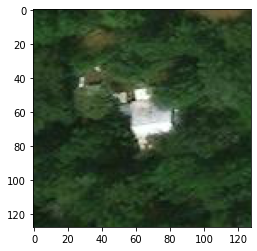

In [226]:
img = Image.open(r"/kaggle/input/satellite-images-of-hurricane-damage/train_another/damage/-93.597636_30.674362.jpeg")
Prediction(img)

**LeNet-5**

Test accuracy: *0.6704*

Test loss: *0.60*

**AlexNet**

Test accuracy: *0.7536*

Test loss: *0.6264*

**VGG16**

Test accuracy: *0.5000*

Test loss: *0.6931*